# "Продвинутая линейная алгебра"

## Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

a) Диагональная, ортогональная, но не единичная(!)

In [183]:
import numpy as np
import sklearn
import pandas as pd

from matplotlib import pyplot as plt
from scipy import linalg

In [184]:
a = np.diag([-1,-1])
print(a)

[[-1  0]
 [ 0 -1]]


In [185]:
at = np.transpose(a)
at

array([[-1,  0],
       [ 0, -1]])

In [186]:
a @ at

array([[1, 0],
       [0, 1]])

b) Верхнетреугольная, ортогональная

In [227]:
b = np.triu([[1,0],[0,1]],0)
b

array([[1, 0],
       [0, 1]])

In [225]:
bt = np.transpose(b)
bt

array([[1, 0],
       [1, 1]])

In [226]:
b @ bt

array([[2, 1],
       [1, 1]])

c) Нижнетреугольная, ортогональная

In [231]:
c = np.tril([[-1,-1],[0,-1]],0)
c

array([[-1,  0],
       [ 0, -1]])

In [232]:
ct = np.transpose(c)
c @ ct

array([[1, 0],
       [0, 1]])


d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [238]:
m = np.array([[2, -1], [-1, 1]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[2.00 -1.00]
 [-1.00 1.00]]
1.0


Найдите собственные значения и собственные вектора матриц:

In [187]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [188]:
w, v = np.linalg.eig(a)

In [189]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение -1.0
соответствующий ему собственный вектор [1.00 0.00]
Собственное значение -1.0
соответствующий ему собственный вектор [0.00 1.00]


## Уровень 1:
Найдите спектральное разложение матрицы:


In [190]:
m = np.array([[1,2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [191]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.24 4.24]

Eigenvectors:
[[-0.85 -0.53]
 [0.53 -0.85]]


In [192]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1.00 2.00]
 [2.00 3.00]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [193]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [194]:
X, y = load_digits(return_X_y=True)

In [195]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


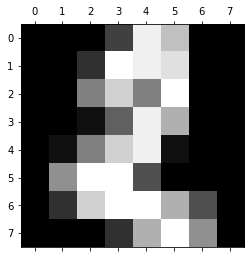

In [196]:
image = X[2]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

1


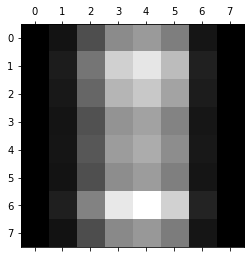

2


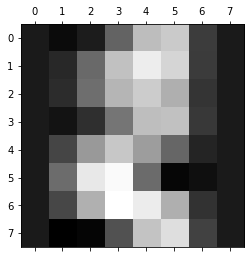

3


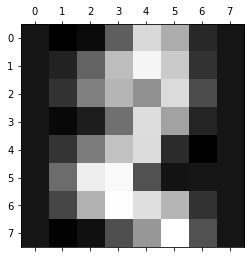

4


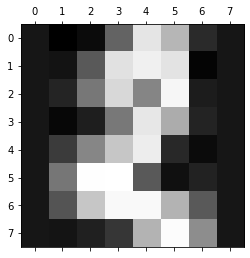

5


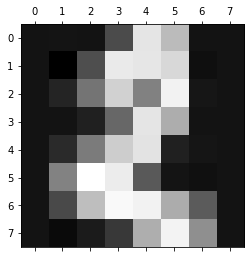

6


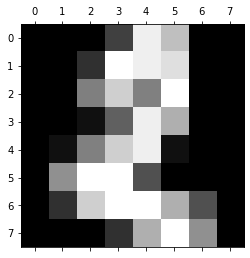

7


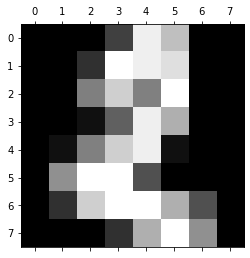

In [197]:

dep = {}

for n_component in range(1,8):
    U, s, V = np.linalg.svd(image)
    S = np.diag(s)[:, :n_component]
    V = V[:n_component, :]
    A = U.dot(S.dot(V))
    print(n_component)
    plt.matshow(A, cmap = 'gray')
    plt.show()
    mse = sklearn.metrics.mean_squared_error(image, A)
    dep[n_component] = mse

In [198]:
df = pd.DataFrame.from_dict(dep, orient='index')

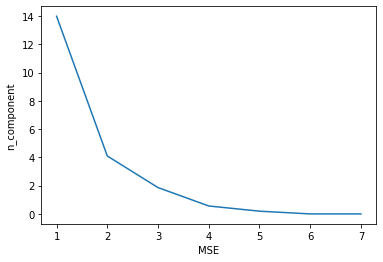

In [199]:
plt.plot(df)
plt.ylabel('n_component')
plt.xlabel('MSE')
plt.show()